# Importación de los Datos

In [ ]:
import pandas as pd
import numpy as np

# Nombre de las columnas
columns = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

# Importacion
data = pd.read_csv('wine.data', names = columns)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# Selección de los Datos
El modelo se encargará de predecir la clase de vino a la que pertenece cada registro, por ello, nuestro atributo "class" será la variable dependiente.

A continuación se realiza la division de variables, datos de entrenamiento y datos de prueba.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separacion variables independientes y dependiente
x = data[columns[1:]]
y = data[columns[0]]

# Separación de los datos de entrenamiento y de prueba. (70% entrenamiento / 30% Prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

print('Total de datos:', len(data))
print('No. de datos de entreamiento:', len(x_train))
print('No. de datos para prediccion:', len(x_test))

Total de datos: 178
No. de datos de entreamiento: 124
No. de datos para prediccion: 54


# Implementacion del Modelo

##### Debido a que se busca asignar una clase a cada uno de los registros se necesita un modelo de clasificación, es por ello que se emplea el siguiente modelo:
---
### **Árbol de Decisión** / Métrica Calidad de Información: Entropía

In [ ]:
# Importacion del modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [71]:
# Instanciación del modelo
model = DecisionTreeClassifier(criterion = "entropy")

# Entrenamiento del modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Visualicación del Modelo Obtenido:

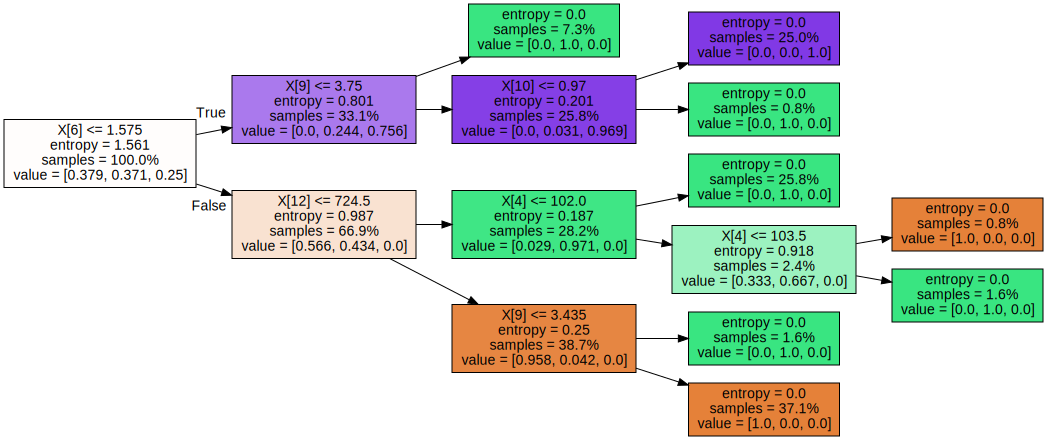

In [73]:
treeData = export_graphviz(model, filled=True, proportion=True, rotate = True)
graphviz.Source(treeData)

# Desempeño del modelo
Comparativa de desempeño del modelo con los datos de entrenamiento y los de prueba/validación

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
# Prediccion para el conjunto de datos de entrenamiento
train_prediction = model.predict(x_train)

# Prediccion para el conjunto de datos de prueba / validación
test_prediction = model.predict(x_test)


# Evaluación del modelo con los datos de entrenamiento
train_score = model.score(x_train, y_train)

# Evaluación del modelo con los datos de entrenamiento
test_score = model.score(x_test, y_test)

print("Presición Modelo Datos de Entrenamiento:", train_score)
print("Presición Modelo Datos de Prueba:", test_score)

Presición Modelo Datos de Entrenamiento: 1.0
Presición Modelo Datos de Prueba: 0.9814814814814815


# Visualización: Salida del Modelo

In [78]:
# Predicción de todos los datos
y_pred = model.predict(x)

# Comparación primeros 10 datos
comp_table = pd.DataFrame({'Real': data['Class'], 'Prediccion': y_pred})
comp_table.head(10)

,Real,Prediccion
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
